In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean
from cartopy import crs, feature
import matplotlib
import xarray as xr

%matplotlib inline

/home/ksuchy/anaconda3/envs/py39/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [2]:
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 'medium'})

In [3]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


In [70]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')

runoff1 = xr.open_dataset('/results/forcing/rivers/R201702DFraCElse_y2019m06d01.nc')
runoff2 = xr.open_dataset('/results/forcing/rivers/R201702DFraCElse_y2019m12d01.nc')

CYrunoff = xr.open_dataset('/results/forcing/rivers/R201702DFraCElse_y2008m06d01.nc')
WYrunoff = xr.open_dataset('/results/forcing/rivers/R201702DFraCElse_y2019m06d01.nc')

mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
# the mask is 1 where there is water, we want the opposite.  The meshmask has an extra dimension, hence the [0]
tmask = 1 - mesh.tmask[0]

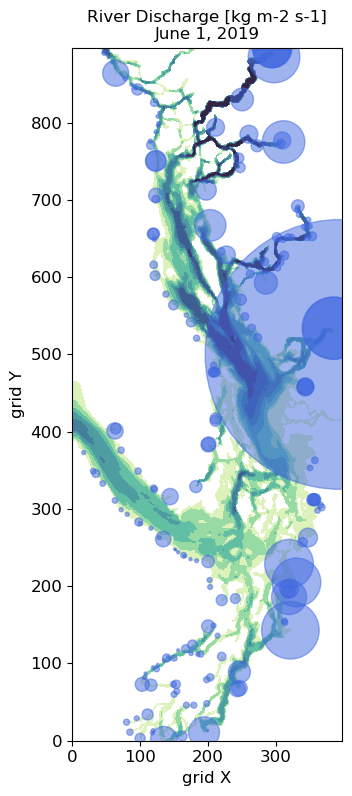

In [71]:
cmap0=cmocean.cm.deep
cmap0.set_bad('lightgray')

# exclude Fraser off the edge
jmax = 398
jj = range(jmax)
ii = range(898)
jjm, iim = np.meshgrid(jj, ii)
fluxarray = np.array(runoff1.rorunoff[0, :, :jmax])
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
colours = ax.contourf(bathy.Bathymetry[:, :jmax], cmap=cmap0)


ax.set_xlabel('grid X')
ax.set_ylabel('grid Y')
# ax.set_title('Bathymetry of SalishSeaCast')


ax.scatter(jjm[fluxarray>0], iim[fluxarray>0], s=fluxarray[fluxarray>0]*1000, color='royalblue',alpha=0.5)
ax.set_title('River Discharge [kg m-2 s-1]\nJune 1, 2019')




# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('Seafloor Depth (m)');
viz_tools.set_aspect(ax);

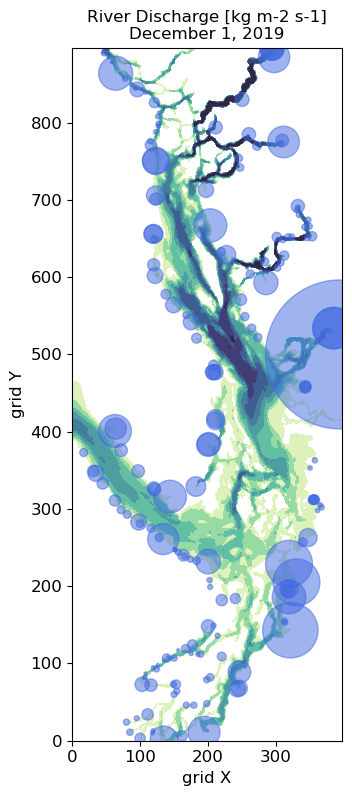

In [72]:
cmap0=cmocean.cm.deep
cmap0.set_bad('lightgray')

# exclude Fraser off the edge
jmax = 398
jj = range(jmax)
ii = range(898)
jjm, iim = np.meshgrid(jj, ii)
fluxarray = np.array(runoff2.rorunoff[0, :, :jmax])
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
colours = ax.contourf(bathy.Bathymetry[:, :jmax], cmap=cmap0)

ax.set_xlabel('grid X')
ax.set_ylabel('grid Y')
# ax.set_title('Bathymetry of SalishSeaCast')


ax.scatter(jjm[fluxarray>0], iim[fluxarray>0], s=fluxarray[fluxarray>0]*1000, color='royalblue',alpha=0.5)
ax.set_title('River Discharge [kg m-2 s-1]\nDecember 1, 2019')




# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('Seafloor Depth (m)');
viz_tools.set_aspect(ax);

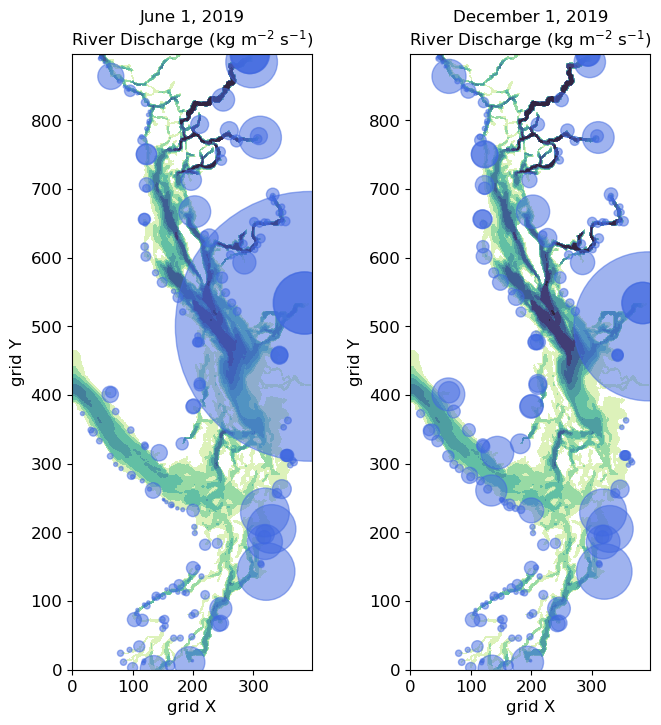

In [69]:
cmap0=cmocean.cm.deep
cmap0.set_bad('lightgray')

# exclude Fraser off the edge
jmax = 398
jj = range(jmax)
ii = range(898)
jjm, iim = np.meshgrid(jj, ii)
fluxarray = np.array(runoff1.rorunoff[0, :, :jmax])
fluxarray2 = np.array(runoff2.rorunoff[0, :, :jmax])

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
colours = ax[0].contourf(bathy.Bathymetry[:, :jmax], cmap=cmap0)


ax[0].set_xlabel('grid X')
ax[0].set_ylabel('grid Y')
# ax.set_title('Bathymetry of SalishSeaCast')



ax[0].scatter(jjm[fluxarray>0], iim[fluxarray>0], s=fluxarray[fluxarray>0]*1000, color='royalblue',alpha=0.5)
ax[0].set_title('June 1, 2019\nRiver Discharge (kg m$^{-2}$ s$^{-1}$)')




# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('Seafloor Depth (m)');
viz_tools.set_aspect(ax[0]);



colours = ax[1].contourf(bathy.Bathymetry[:, :jmax], cmap=cmap0)

ax[1].set_xlabel('grid X')
ax[1].set_ylabel('grid Y')
# ax.set_title('Bathymetry of SalishSeaCast')


ax[1].scatter(jjm[fluxarray2>0], iim[fluxarray2>0], s=fluxarray2[fluxarray2>0]*1000, color='royalblue',alpha=0.5)
ax[1].set_title('December 1, 2019\nRiver Discharge (kg m$^{-2}$ s$^{-1}$)')




# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('Seafloor Depth (m)');
viz_tools.set_aspect(ax[1]);

#plt.savefig('SuppFigureS1_Rivers.png', bbox_inches='tight',dpi=1000,transparent=False)

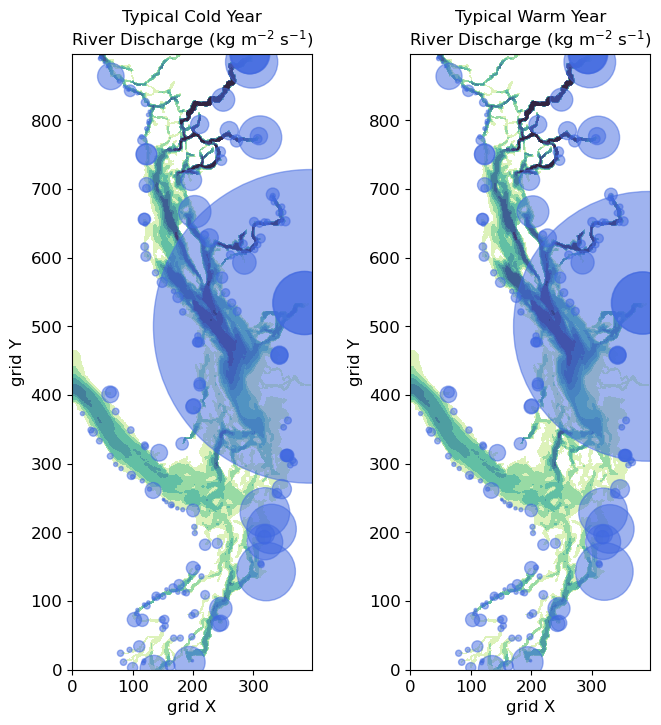

In [73]:
cmap0=cmocean.cm.deep
cmap0.set_bad('lightgray')

# exclude Fraser off the edge
jmax = 398
jj = range(jmax)
ii = range(898)
jjm, iim = np.meshgrid(jj, ii)
fluxarray = np.array(CYrunoff.rorunoff[0, :, :jmax])
fluxarray2 = np.array(WYrunoff.rorunoff[0, :, :jmax])

fig, ax = plt.subplots(1, 2, figsize=(8, 8))
colours = ax[0].contourf(bathy.Bathymetry[:, :jmax], cmap=cmap0)


ax[0].set_xlabel('grid X')
ax[0].set_ylabel('grid Y')
# ax.set_title('Bathymetry of SalishSeaCast')



ax[0].scatter(jjm[fluxarray>0], iim[fluxarray>0], s=fluxarray[fluxarray>0]*1000, color='royalblue',alpha=0.5)
ax[0].set_title('Typical Cold Year\nRiver Discharge (kg m$^{-2}$ s$^{-1}$)')




# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('Seafloor Depth (m)');
viz_tools.set_aspect(ax[0]);



colours = ax[1].contourf(bathy.Bathymetry[:, :jmax], cmap=cmap0)

ax[1].set_xlabel('grid X')
ax[1].set_ylabel('grid Y')
# ax.set_title('Bathymetry of SalishSeaCast')


ax[1].scatter(jjm[fluxarray2>0], iim[fluxarray2>0], s=fluxarray2[fluxarray2>0]*1000, color='royalblue',alpha=0.5)
ax[1].set_title('Typical Warm Year\nRiver Discharge (kg m$^{-2}$ s$^{-1}$)')




# cb = fig.colorbar(colours, ax=ax)
# cb.set_label('Seafloor Depth (m)');
viz_tools.set_aspect(ax[1]);

#plt.savefig('SuppFigureS1_Rivers.png', bbox_inches='tight',dpi=1000,transparent=False)